Interacting Proteins

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsDontMatter\\')
import plot_utils as p

In [2]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


In [3]:
c = cptac.Colon()

In [4]:
ip = u.get_interacting_proteins('PTEN')
len(ip)

28

In [5]:
gene = 'PTEN'

In [6]:
mut_type_gbm = c.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = c.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = ip)
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type_gbm = mut_type_gbm[['Mutation']] 
merged = ip_df.join(mut_type_gbm) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
del_wt = merged[get]
del_wt['Mutation'].value_counts()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 100 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 382)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 05CO045 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 382)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: MAGI3, MAST2, MDM2, PIK3R3, PREX2 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 201 samples for the PTEN gene 

Wildtype_Tumor    76
Deletion          25
Name: Mutation, dtype: int64

In [14]:
cols = list(del_wt.columns[:-1])

u.wrap_ttest(del_wt, 'Mutation', cols, return_all = True)


,Comparison,P_Value
0,PTEN_proteomics,0.012872
1,SHC1_proteomics,0.030107
2,PIK3C3_proteomics,0.116419
3,INPP4B_proteomics,0.118135
4,PIK3CD_proteomics,0.131200
5,CSNK2A1_proteomics,0.144425
6,MVP_proteomics,0.182782
7,USP7_proteomics,0.237441
8,PDGFRB_proteomics,0.250276
9,CSNK2A2_proteomics,0.326372


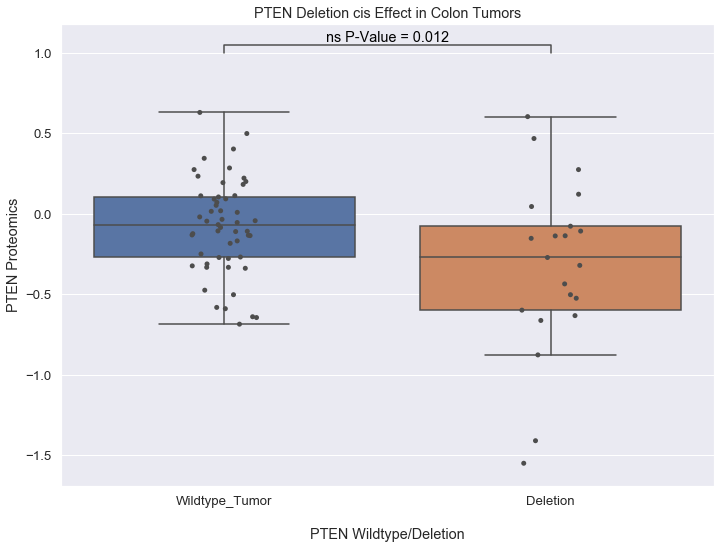

In [15]:
#cis
gene = 'PTEN'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion cis Effect in Colon Tumors')
boxplot = sns.stripplot(x='Mutation', y=gene+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = gene+' Proteomics')

format_pval_annotation('ns P-Value = 0.012', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

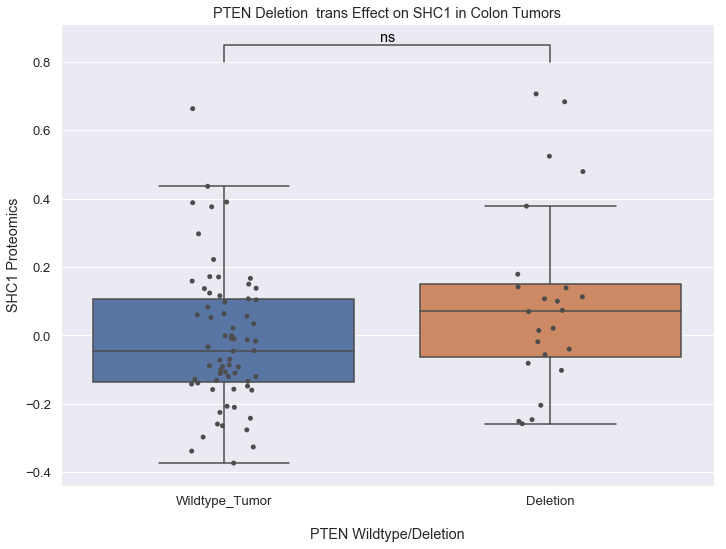

In [19]:
#trans
g = 'SHC1'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=g+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion  trans Effect on '+g+' in Colon Tumors')
boxplot = sns.stripplot(x='Mutation', y=g+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = g+' Proteomics')

format_pval_annotation('ns', 0, 1, .8)

plt.show()
plt.clf()
plt.close()

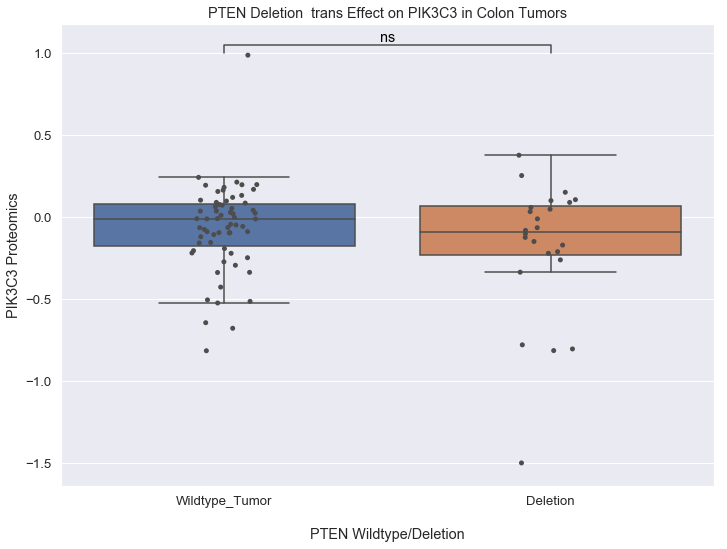

In [21]:
#trans
g = 'PIK3C3'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=g+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion  trans Effect on '+g+' in Colon Tumors')
boxplot = sns.stripplot(x='Mutation', y=g+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = g+' Proteomics')

format_pval_annotation('ns', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

In [22]:
d = del_wt[del_wt.Mutation == "Deletion"]
wt = del_wt[del_wt.Mutation == "Wildtype_Tumor"]
del_med = d.median()
wt_med = wt.median()

d = {}

for prot in ip:
    dif = del_med[prot+'_proteomics'] - wt_med[prot+'_proteomics']
    d[prot] = dif
    print(del_med[prot+'_proteomics'], '-', wt_med[prot+'_proteomics'], '=',dif)

df = pd.DataFrame.from_dict(d, orient='index', columns=['Colon'])
df

nan - nan = nan
0.09255 - 0.141 = -0.04844999999999999
0.14950000000000002 - 0.125 = 0.024500000000000022
0.0567 - -0.0006 = 0.057300000000000004
-0.09265000000000001 - -0.0127 = -0.07995000000000001
0.09154999999999999 - 0.0433 = 0.048249999999999994
-0.388 - -0.16699999999999998 = -0.22100000000000003
nan - nan = nan
-0.0295 - -0.21 = 0.1805
-0.03335 - -0.0672 = 0.03385
-0.21395 - -0.263 = 0.04905000000000001
-0.2345 - -0.21100000000000002 = -0.023499999999999965
-0.0742 - 0.011300000000000001 = -0.0855
-0.00795 - -0.002 = -0.00595
0.1655 - 0.121 = 0.04450000000000001
-0.038 - 0.031 = -0.069
-0.272 - -0.068 = -0.20400000000000001
nan - nan = nan
nan - nan = nan
-0.183 - -0.107 = -0.076
-0.14500000000000002 - -0.184 = 0.03899999999999998
0.0716 - -0.0445 = 0.1161
-0.025099999999999997 - -0.17 = 0.14490000000000003
0.0183 - -0.0639 = 0.0822
-0.07705000000000001 - -0.06459999999999999 = -0.012450000000000017
-0.0989 - -0.0922 = -0.006699999999999998
0.0919 - -0.145 = 0.2369
nan - nan = 

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Colon
MDM2,NaN
CSNK2A1,-0.04845
PDGFRB,0.02450
PIK3R2,0.05730
PIK3C3,-0.07995
CSNK2A2,0.04825
SLC9A3R1,-0.22100
PIK3R3,NaN
USP13,0.18050
PIK3CA,0.03385
